<a href="https://colab.research.google.com/github/anashinpetya/My-projects/blob/main/Multivariate_statistical_methods_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
df=pd.read_excel("ip2countries.xlsx",index_col=0)
df

,GDP,CPI,Exp,Inv,Imp,Int,Mrk cap,Life exp,Unemp,Urb
country,,,,,,,,,,
Algeria,10555.772954,103.842544,35.572189,1.094766,28.552176,18.907697,0.164078,74.346250,14.75335,66.94180
Argentina,21474.463151,120.815036,17.998675,2.001816,14.966152,41.032790,14.708948,75.163050,10.34445,90.68355
Australia,44901.794215,98.176379,20.517508,3.454120,21.400773,73.274612,106.567616,81.429024,5.49395,85.10010
Austria,51798.843942,100.133738,50.613354,2.472894,47.368905,68.536550,28.661590,80.316829,5.06380,58.32815
Bahrain,46856.865221,98.479885,81.963721,4.321228,65.436800,57.793507,77.775780,75.945050,1.05190,88.70820
...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,74871.484301,98.379604,79.703903,2.833255,60.832100,65.037136,48.412952,76.209050,2.43215,83.76305
United Kingdom,43018.952370,99.439153,27.430591,4.411623,29.179097,76.139812,88.803021,79.945854,5.64245,81.13395
United States,55544.088377,98.764728,11.529890,1.810370,15.297821,70.959540,130.079464,78.044024,5.88330,80.71515


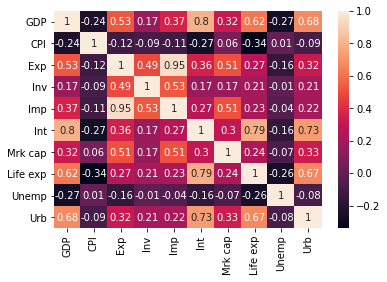

In [ ]:
#матирца парных корреляций (R)
import seaborn as sns
sns.heatmap(df.corr().round(2),annot=True)

In [ ]:
import numpy as np
from scipy import stats, linalg

def partial_corr(C):
    
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
        
    return P_corr

In [ ]:
df_partial=pd.DataFrame(partial_corr(df), columns=df.columns, index=df.columns)

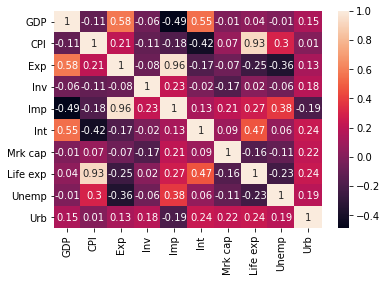

In [ ]:
sns.heatmap(df_partial.round(2),annot=True)

In [ ]:
df_corr=df.corr()

In [ ]:
#df_corr.to_excel("корреляции_парные.xlsx", sheet_name="Sheet1")
#df_partial.to_excel("корреляции_частные.xlsx", sheet_name="Sheet2")
#from google.colab import files
#files.download("корреляции_парные.xlsx")
#files.download("корреляции_частные.xlsx")

In [ ]:
alg_dop=np.zeros((df_corr.shape))

In [ ]:
def minor(i,j):
  return np.delete(np.delete(df_corr.values,i,axis=0),j,axis=1)
for i in range(0,10):
  for j in range(0,10):
    alg_dop[i][j]=((-1)**(i+1+j+1))*np.linalg.det(minor(i,j))

In [ ]:
pd.DataFrame(alg_dop)

,0,1,2,3,4,5,6,7,8,9
0,0.002864,0.000145,-0.003643,0.000080,0.002869,-0.001519,0.000007,0.000024,0.000035,-0.000333
1,0.000145,0.000655,0.000018,0.000003,0.000038,-0.000006,-0.000115,0.000321,0.000093,-0.000216
2,-0.003643,0.000018,0.014158,0.000247,-0.012725,0.000836,0.000189,0.001360,0.001243,-0.000729
3,0.000080,0.000003,0.000247,0.000787,-0.000715,0.000044,0.000141,-0.000064,0.000028,-0.000173
4,0.002869,0.000038,-0.012725,-0.000715,0.012536,-0.000636,-0.000630,-0.001241,-0.001193,0.000871
5,-0.001519,-0.000006,0.000836,0.000044,-0.000636,0.002724,-0.000071,-0.001118,-0.000189,-0.000333
6,0.000007,-0.000115,0.000189,0.000141,-0.000630,-0.000071,0.000813,0.000020,0.000049,-0.000194
7,0.000024,0.000321,0.001360,-0.000064,-0.001241,-0.001118,0.000020,0.001915,0.000449,-0.000565
8,0.000035,0.000093,0.001243,0.000028,-0.001193,-0.000189,0.000049,0.000449,0.000751,-0.000266
9,-0.000333,-0.000216,-0.000729,-0.000173,0.000871,-0.000333,-0.000194,-0.000565,-0.000266,0.001463


In [ ]:
multiple_corr=np.zeros((10,10))
for i in range(0,10):
  for j in range(0,10):
    multiple_corr[i][j]=(1-np.linalg.det(df_corr)/alg_dop[i][j])**0.5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [ ]:
for i in range(0,10):
  for j in range(0,10):
    if i==j:
      print(multiple_corr[i][j])

0.9046224341583214
0.45393278473485105
0.9814561287970917
0.582177711635909
0.9790312327688359
0.8994754514876795
0.600238337809388
0.8534474625848687
0.5543247806154716
0.8026976053439938


In [ ]:
#матрица парных корреляций R
R=df.corr()
R

,GDP,CPI,Exp,Inv,Imp,Int,Mrk cap,Life exp,Unemp,Urb
GDP,1.000000,-0.236342,0.532805,0.174324,0.368532,0.804636,0.322450,0.622357,-0.270527,0.676767
CPI,-0.236342,1.000000,-0.115065,-0.086395,-0.107319,-0.266553,0.064656,-0.340916,0.011010,-0.091354
Exp,0.532805,-0.115065,1.000000,0.487265,0.954772,0.357654,0.511539,0.271607,-0.160050,0.317348
Inv,0.174324,-0.086395,0.487265,1.000000,0.534589,0.171685,0.174917,0.208936,-0.010209,0.211210
Imp,0.368532,-0.107319,0.954772,0.534589,1.000000,0.268038,0.514566,0.226289,-0.037938,0.221923
Int,0.804636,-0.266553,0.357654,0.171685,0.268038,1.000000,0.301844,0.792547,-0.160649,0.727482
Mrk cap,0.322450,0.064656,0.511539,0.174917,0.514566,0.301844,1.000000,0.242780,-0.074175,0.334049
Life exp,0.622357,-0.340916,0.271607,0.208936,0.226289,0.792547,0.242780,1.000000,-0.261946,0.668005
Unemp,-0.270527,0.011010,-0.160050,-0.010209,-0.037938,-0.160649,-0.074175,-0.261946,1.000000,-0.084239
Urb,0.676767,-0.091354,0.317348,0.211210,0.221923,0.727482,0.334049,0.668005,-0.084239,1.000000


In [ ]:
np.set_printoptions(suppress = True)

In [ ]:
#собственные значения матрицы парных корреляций R
np.linalg.eigvals(R)

array([4.19669282, 1.82080226, 1.06713464, 0.96557609, 0.74303274,
       0.5115694 , 0.01901481, 0.11817776, 0.25686832, 0.30113114])

In [ ]:
sum(np.linalg.eigvals(R))

10.000000000000009

In [ ]:
#таблица собственных значений (eigenvalue)
df_eig_var=pd.DataFrame(pd.DataFrame(np.linalg.eigvals(R),columns=["eigenvalues"]).sort_values(by=["eigenvalues"], ascending=False).values,columns=["eigenvalues"])
df_eig_var

,eigenvalues
0,4.196693
1,1.820802
2,1.067135
3,0.965576
4,0.743033
5,0.511569
6,0.301131
7,0.256868
8,0.118178
9,0.019015


In [ ]:
#percent of variance (доля объясненной дисперсии) и cumulative percentage (процент накопленной дисперсии)
summa=sum(np.linalg.eigvals(R))
df_eig_var["percent of variance"]=df_eig_var["eigenvalues"].apply(lambda x: x/summa*100)
df_eig_var["cumulative percentage"]=df_eig_var["percent of variance"].cumsum()
df_eig_var

,eigenvalues,percent of variance,cumulative percentage
0,4.196693,41.966928,41.966928
1,1.820802,18.208023,60.174951
2,1.067135,10.671346,70.846297
3,0.965576,9.655761,80.502058
4,0.743033,7.430327,87.932386
5,0.511569,5.115694,93.048080
6,0.301131,3.011311,96.059391
7,0.256868,2.568683,98.628074
8,0.118178,1.181778,99.809852
9,0.019015,0.190148,100.000000


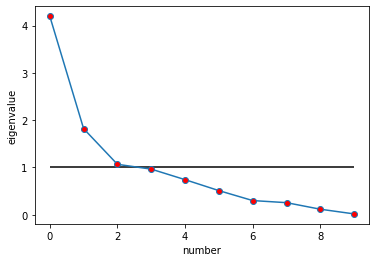

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_eig_var["eigenvalues"], marker='o', markerfacecolor="red")
plt.xlabel("number")
plt.ylabel("eigenvalue")
plt.hlines(y=1, xmin=0, xmax=9)

In [ ]:
#метод главных компонент ДЛЯ ВСЕХ ФАКТОРОВ
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
pd.set_option('display.float_format', lambda x: '%.5f' % x)
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
X=df.values
X=standardscaler.fit_transform(X)
X_pca=pca.fit_transform(X)
X_pca.shape

(87, 10)

In [ ]:
#файл с коэффициентами и значениями МГК для всех факторов
#from google.colab import files
#pd.DataFrame(X_pca,index=df.index,columns=["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10"]).to_excel("Главные компоненты на всех факторах.xlsx")
#files.download("Главные компоненты на всех факторах.xlsx")
#pd.DataFrame(pca.components_,columns=["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"],index=["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10"]).to_excel("Коэффициенты МГК на всех факторах.xlsx")
#files.download("Коэффициенты МГК на всех факторах.xlsx")

In [ ]:
pd.DataFrame(pca.components_,columns=["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"],index=["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10"])

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
f1,0.40984,-0.13899,0.36747,0.22218,0.32895,0.40196,0.26955,0.37026,-0.12459,0.36504
f2,-0.19789,0.18897,0.42616,0.35334,0.50258,-0.31699,0.25979,-0.33912,0.13022,-0.25720
f3,0.08193,0.75331,-0.01325,-0.31331,-0.09064,0.00536,0.37848,-0.07476,-0.38893,0.13828
f4,-0.01869,0.25217,-0.12540,-0.04602,-0.05356,0.14143,0.20888,-0.02105,0.86331,0.32553
f5,-0.06147,0.43993,-0.12712,0.70362,-0.11708,0.02588,-0.46044,0.10807,-0.08870,0.21334
f6,-0.43697,-0.19986,-0.33401,0.33827,-0.19431,-0.10011,0.62680,0.29017,-0.13230,0.02785
f7,0.41641,-0.24476,-0.08548,0.24936,-0.30300,-0.14586,0.18966,-0.66561,-0.09277,0.31065
f8,0.35677,0.12676,-0.15673,0.22910,-0.16808,0.43933,0.17205,-0.03823,0.10605,-0.71835
f9,0.50571,0.06670,0.00571,0.02707,-0.11633,-0.70033,0.04554,0.44334,0.14696,-0.12177
f10,0.18618,0.00017,-0.71262,-0.02435,0.66563,-0.04971,-0.02130,-0.07025,-0.06424,0.04321


In [ ]:
pd.DataFrame(pca.explained_variance_ratio_).cumsum()

,0
0,0.41967
1,0.60175
2,0.70846
3,0.80502
4,0.87932
5,0.93048
6,0.96059
7,0.98628
8,0.99810
9,1.00000


In [ ]:
df_pca=pd.DataFrame(X_pca,index=df.index,columns=["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10"])
df_pca

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
country,,,,,,,,,,
Algeria,-1.60561,0.04027,-0.01188,1.18863,0.41481,-0.19125,-0.51835,-0.62006,0.67255,-0.30441
Argentina,-1.21126,-0.54723,3.10952,1.90919,2.30034,-0.62819,-0.69672,-0.27858,0.31703,-0.10496
Australia,1.11754,-1.96586,0.40280,0.23404,0.03345,0.56446,0.22437,0.35458,-0.14591,0.08133
Austria,0.98937,-0.95323,0.22199,-0.49502,0.00567,-0.67928,-0.49468,0.87877,0.12595,0.07980
Bahrain,1.84847,-0.21676,0.57012,-0.87661,-0.15049,-0.55820,0.32098,-0.65016,-0.25799,-0.05477
...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,2.22152,-0.71535,0.46164,-0.75013,-0.21186,-1.35044,0.66280,0.09574,0.24977,0.09313
United Kingdom,1.08131,-1.62998,0.44545,0.20460,0.16569,0.26703,0.06721,0.46336,-0.35640,0.09356
United States,0.88565,-1.98950,0.65651,0.34629,-0.18488,0.42944,0.73984,0.75834,0.04695,0.24471


In [ ]:
#вычислим Махаланобиса
import pandas as pd
import scipy as sp
import numpy as np
from scipy.stats import chi2
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()
df_pca['mahala'] = mahalanobis(x=df_pca, data=df_pca)
df_pca['p_value'] = 1 - chi2.cdf(df_pca['mahala'], 2)
countries=df_pca.loc[df_pca.p_value < 0.01].index
df_pca.loc[df_pca.p_value < 0.01]

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,mahala,p_value
country,,,,,,,,,,,,
Algeria,-1.60561,0.04027,-0.01188,1.18863,0.41481,-0.19125,-0.51835,-0.62006,0.67255,-0.30441,13.31665,0.00128
Argentina,-1.21126,-0.54723,3.10952,1.90919,2.30034,-0.62819,-0.69672,-0.27858,0.31703,-0.10496,24.30410,0.00001
Barbados,-0.36778,0.07697,-0.79662,-0.13913,-0.29774,0.35016,-1.10964,1.20899,-0.24977,-0.18109,12.89098,0.00159
Botswana,-1.87609,1.11375,-1.24814,1.30897,-0.65750,-0.73428,0.94737,-0.53867,-0.06689,-0.08401,10.78377,0.00455
Cyprus,2.19903,1.70201,-2.53885,-0.54769,3.56424,1.66237,1.03500,1.15326,0.30764,-0.05123,40.79303,0.00000
"Egypt, Arab Rep.",-2.36252,0.74191,1.94872,0.92213,1.05809,-0.18896,-0.82812,0.66148,0.47930,-0.02391,13.44645,0.00120
Eswatini,-3.38450,2.74989,-1.21643,2.11606,-0.91041,-1.63798,0.61119,0.77691,-0.32003,-0.01533,23.46309,0.00001
Ghana,-2.53902,1.52253,1.80387,-0.07885,1.06418,-0.66743,-0.00419,-0.19646,-0.20763,0.28165,12.79784,0.00166
"Hong Kong SAR, China",7.17093,5.35238,3.55791,1.30374,-2.58940,3.22372,0.05146,0.15273,0.04778,0.02923,70.29444,0.00000


In [ ]:
df_pca.loc[df_pca.p_value < 0.000005].sort_values(by=["mahala"],ascending=False)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,mahala,p_value
country,,,,,,,,,,,,
"Hong Kong SAR, China",7.17093,5.35238,3.55791,1.30374,-2.58940,3.22372,0.05146,0.15273,0.04778,0.02923,70.29444,0.00000
Malta,4.48162,3.85232,-2.40951,-0.73305,4.23579,0.86773,0.47370,-0.19595,-0.21721,-0.08202,45.66874,0.00000
Cyprus,2.19903,1.70201,-2.53885,-0.54769,3.56424,1.66237,1.03500,1.15326,0.30764,-0.05123,40.79303,0.00000
Luxembourg,5.84632,2.05806,0.09372,-0.65163,-0.44831,-2.56004,0.15549,0.23278,0.64269,0.10884,28.08313,0.00000
Qatar,2.60913,-1.90610,0.32202,-0.91185,-0.55907,-0.71657,1.78510,-0.05267,1.12435,0.02446,27.00762,0.00000
South Africa,-1.97443,1.49646,-0.19102,3.67520,-1.25523,0.40019,1.12970,0.45328,-0.03939,-0.23287,26.21329,0.00000


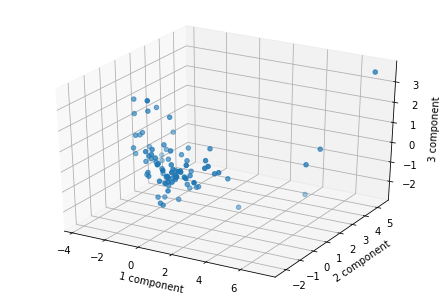

In [ ]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(df_pca["f1"],df_pca["f2"],df_pca["f3"])
ax.set_xlabel("1 component")
ax.set_ylabel("2 component")
ax.set_zlabel("3 component")

pyplot.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_pca, x='f1', y='f2', z='f3',color='mahala',text=df_pca.index,size_max=10)
fig.show()

In [ ]:
outlying_observations=df_pca.loc[df_pca.p_value < 0.000005]
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=df_pca['f1'], y=df_pca['f2'], z=df_pca['f3'], mode='markers',text=df_pca.index,marker=dict(size=5,color=df_pca['mahala'],colorscale="Inferno")))
fig.update_layout(scene = dict(
                    xaxis_title='1 component',
                    yaxis_title='2 component',
                    zaxis_title='3 component')
                    )
fig.show()

**Сначала построим все 9 компонент, хотя видно, что первые 3 компоненты объясняют более 91% первоначальной изменчивости**



In [ ]:
X=df.drop(columns=["Exp"])
import numpy as np
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
previous_columns=X.columns
previous_rows=X.index
X=standardscaler.fit_transform(X.values)
X=pd.DataFrame(X,columns=previous_columns,index=previous_rows)
pca=PCA(n_components=9)
X_pca=pca.fit_transform(X)
X_pca=pd.DataFrame(X_pca,columns=["f1","f2","f3","f4","f5","f6","f7","f8","f9"],index=X.index)
weights=pd.DataFrame(pca.components_,columns=["x1","x2","x3","x4","x5","x6","x7","x8","x9"],index=["f1","f2","f3","f4","f5","f6","f7","f8","f9"])
weights

,x1,x2,x3,x4,x5,x6,x7,x8,x9
f1,0.44651,-0.16336,0.19864,0.27157,0.46111,0.25756,0.43289,-0.13817,0.41868
f2,-0.12924,0.21748,0.51140,0.59277,-0.21022,0.41617,-0.23769,0.18522,-0.12204
f3,0.08464,0.74360,-0.32754,-0.10043,0.00470,0.36446,-0.07288,-0.40874,0.13150
f4,0.01001,0.22371,-0.22270,-0.14059,0.15879,0.13940,-0.02467,0.85578,0.32076
f5,-0.02158,0.47737,0.58475,-0.17538,0.05347,-0.57252,0.08709,-0.00767,0.24633
f6,0.59954,0.11139,-0.23841,0.41140,0.11857,-0.42284,-0.42307,0.06459,-0.16141
f7,0.28075,-0.26962,0.23030,-0.37036,-0.22352,0.19249,-0.60328,-0.10688,0.44260
f8,0.28417,0.07476,0.29943,-0.44262,0.39908,0.25019,-0.06059,0.10059,-0.62645
f9,0.50712,0.06674,0.02596,-0.10928,-0.70129,0.04448,0.44272,0.14630,-0.12070


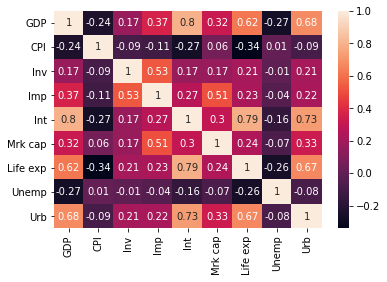

In [ ]:
df_dop=df.drop(columns=["Exp"])
sns.heatmap(df_dop.corr().round(2),annot=True)

In [ ]:
#таблица собственных значений (eigenvalue)
R_dop=df_dop.corr()
df_eig_var_dop=pd.DataFrame(pd.DataFrame(np.linalg.eigvals(R_dop),columns=["eigenvalues"]).sort_values(by=["eigenvalues"], ascending=False).values,columns=["eigenvalues"])
df_eig_var_dop

,eigenvalues
0,3.72675
1,1.45941
2,1.06686
3,0.94269
4,0.72737
5,0.42086
6,0.29686
7,0.24103
8,0.11817


In [ ]:
#percent of variance (доля объясненной дисперсии) и cumulative percentage (процент накопленной дисперсии)
summa=sum(np.linalg.eigvals(R_dop))
df_eig_var_dop["percent of variance"]=df_eig_var_dop["eigenvalues"].apply(lambda x: x/summa*100)
df_eig_var_dop["cumulative percentage"]=df_eig_var_dop["percent of variance"].cumsum()
df_eig_var_dop

,eigenvalues,percent of variance,cumulative percentage
0,3.72675,41.40838,41.40838
1,1.45941,16.21568,57.62406
2,1.06686,11.85403,69.47809
3,0.94269,10.47432,79.95241
4,0.72737,8.08189,88.03430
5,0.42086,4.67623,92.71053
6,0.29686,3.29839,96.00893
7,0.24103,2.67807,98.68700
8,0.11817,1.31300,100.00000


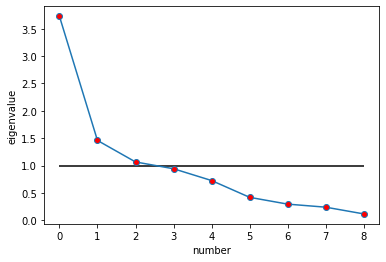

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_eig_var_dop["eigenvalues"], marker='o', markerfacecolor="red")
plt.xlabel("number")
plt.ylabel("eigenvalue")
plt.hlines(y=1, xmin=0, xmax=8)

In [ ]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
y=df["Exp"].values.reshape(-1,1)
y_scaled=standardscaler.fit_transform(y)
import statsmodels.api as sm
X = X_pca
X_sm=sm.add_constant(X)
y_sm=y_scaled
model=sm.OLS(y_sm,X_sm)
results = model.fit()
print(results.summary(alpha=0.1))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     224.3
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           1.88e-51
Time:                        09:59:24   Log-Likelihood:                 20.267
No. Observations:                  87   AIC:                            -20.53
Df Residuals:                      77   BIC:                             4.125
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const       4.424e-17      0.022   2.02e-15      1.0

In [ ]:
X_sm=X_sm.drop(columns=["f3","f9"])
y_sm=y_scaled
model=sm.OLS(y_sm,X_sm)
results = model.fit()
print(results.summary(alpha=0.1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     292.5
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           9.79e-54
Time:                        09:59:27   Log-Likelihood:                 19.788
No. Observations:                  87   AIC:                            -23.58
Df Residuals:                      79   BIC:                            -3.848
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const       4.424e-17      0.022   2.04e-15      1.0

In [ ]:
outlying_observations

NameError: ignored

In [ ]:
#пересчет МГК без выбросов
dropped_indexes=["Hong Kong SAR, China","South Africa"]
X=df.drop(columns=["Exp"])
X=df.drop(index=dropped_indexes)
remained_indexes=X.index
pca=PCA(n_components=9)
X=standardscaler.fit_transform(X)
X_pca=pca.fit_transform(X)
X_pca=pd.DataFrame(X_pca,columns=["f1","f2","f3","f4","f5","f6","f7","f8","f9"],index=remained_indexes)
X=X_pca
y=df["Exp"].drop(index=dropped_indexes).values.reshape(-1,1)
y_scaled=standardscaler.fit_transform(y)
X_sm=sm.add_constant(X)
y_sm=y_scaled
model=sm.OLS(y_sm,X_sm)
results = model.fit()
print(results.summary(alpha=0.1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     723.0
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           4.38e-69
Time:                        09:59:32   Log-Likelihood:                 69.560
No. Observations:                  85   AIC:                            -119.1
Df Residuals:                      75   BIC:                            -94.69
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const       1.015e-16      0.012   8.23e-15      1.0

In [ ]:
#выбрасываем f7, f9 и f4
X_sm=X_sm.drop(columns=["f7","f9","f4"])
y_sm=y_scaled
model=sm.OLS(y_sm,X_sm)
results = model.fit()
print(results.summary(alpha=0.1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1072.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           9.10e-73
Time:                        09:59:36   Log-Likelihood:                 67.443
No. Observations:                  85   AIC:                            -120.9
Df Residuals:                      78   BIC:                            -103.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const       1.015e-16      0.012   8.19e-15      1.0

In [ ]:
kendall_coef_list=[]
p_value_kendall_list=[]
from scipy import stats
for i in range(0,10):
  for j in range(0,10):
    if i==j:
      kendall_coef_list.append(np.nan)
      p_value_kendall_list.append(np.nan)
    if i!=j:
      x=df.iloc[:,i]
      y=df.iloc[:,j]
      tau, p_value = stats.kendalltau(x,y)
      kendall_coef_list.append(tau)
      p_value_kendall_list.append(p_value)

In [ ]:
coef_kendall=pd.DataFrame(np.array(kendall_coef_list).reshape([10,10]),index=df.columns,columns=df.columns)
p_value_kendall=pd.DataFrame(np.array(p_value_kendall_list).reshape([10,10]),index=df.columns,columns=df.columns)

In [ ]:
#коэффициенты Кендалла
coef_kendall

,GDP,CPI,Exp,Inv,Imp,Int,Mrk cap,Life exp,Unemp,Urb
GDP,nan,-0.13713,0.31997,0.12911,0.15531,0.73483,0.36541,0.60438,-0.11468,0.56677
CPI,-0.13713,nan,-0.15531,-0.03395,-0.15958,-0.11361,-0.01149,-0.12323,-0.03502,-0.02460
Exp,0.31997,-0.15531,nan,0.34403,0.72841,0.27720,0.12376,0.16921,-0.05694,0.15934
Inv,0.12911,-0.03395,0.34403,nan,0.44988,0.18257,0.05801,0.15370,0.14248,0.13795
Imp,0.15531,-0.15958,0.72841,0.44988,nan,0.17134,0.04571,0.10933,0.04036,0.03689
Int,0.73483,-0.11361,0.27720,0.18257,0.17134,nan,0.35044,0.64608,-0.05266,0.51972
Mrk cap,0.36541,-0.01149,0.12376,0.05801,0.04571,0.35044,nan,0.31836,-0.14408,0.34648
Life exp,0.60438,-0.12323,0.16921,0.15370,0.10933,0.64608,0.31836,nan,-0.04518,0.46678
Unemp,-0.11468,-0.03502,-0.05694,0.14248,0.04036,-0.05266,-0.14408,-0.04518,nan,-0.05347
Urb,0.56677,-0.02460,0.15934,0.13795,0.03689,0.51972,0.34648,0.46678,-0.05347,nan


In [ ]:
#тау-статистика Кендалла
tau_kendall=coef_kendall.apply(lambda x: abs(x)*np.sqrt(9*87*(87-1)/(2*(2*87+5))))
tau_kendall

,GDP,CPI,Exp,Inv,Imp,Int,Mrk cap,Life exp,Unemp,Urb
GDP,nan,1.88069,4.38829,1.77071,2.12999,10.07803,5.01152,8.28899,1.57274,7.77311
CPI,1.88069,nan,2.12999,0.46559,2.18864,1.55808,0.15764,1.69006,0.48026,0.33732
Exp,4.38829,2.12999,nan,4.71823,9.99004,3.80172,1.69739,2.32062,0.78087,2.18527
Inv,1.77071,0.46559,4.71823,nan,6.17000,2.50393,0.79554,2.10799,1.95402,1.89195
Imp,2.12999,2.18864,9.99004,6.17000,nan,2.34995,0.62690,1.49942,0.55358,0.50599
Int,10.07803,1.55808,3.80172,2.50393,2.34995,nan,4.80622,8.86089,0.72222,7.12779
Mrk cap,5.01152,0.15764,1.69739,0.79554,0.62690,4.80622,nan,4.36629,1.97601,4.75186
Life exp,8.28899,1.69006,2.32062,2.10799,1.49942,8.86089,4.36629,nan,0.61957,6.40182
Unemp,1.57274,0.48026,0.78087,1.95402,0.55358,0.72222,1.97601,0.61957,nan,0.73331
Urb,7.77311,0.33732,2.18527,1.89195,0.50599,7.12779,4.75186,6.40182,0.73331,nan


In [ ]:
#значимые коэффициенты
tau_kendall[tau_kendall>1.96].fillna("")

,GDP,CPI,Exp,Inv,Imp,Int,Mrk cap,Life exp,Unemp,Urb
GDP,,,4.38829,,2.12999,10.07803,5.01152,8.28899,,7.77311
CPI,,,2.12999,,2.18864,,,,,
Exp,4.38829,2.12999,,4.71823,9.99004,3.80172,,2.32062,,2.18527
Inv,,,4.71823,,6.17000,2.50393,,2.10799,,
Imp,2.12999,2.18864,9.99004,6.17000,,2.34995,,,,
Int,10.07803,,3.80172,2.50393,2.34995,,4.80622,8.86089,,7.12779
Mrk cap,5.01152,,,,,4.80622,,4.36629,1.97601,4.75186
Life exp,8.28899,,2.32062,2.10799,,8.86089,4.36629,,,6.40182
Unemp,,,,,,,1.97601,,,
Urb,7.77311,,2.18527,,,7.12779,4.75186,6.40182,,


In [ ]:
spearman_coef_list=[]
p_value_spearman_list=[]
from scipy import stats
for i in range(0,10):
  for j in range(0,10):
    if i==j:
      spearman_coef_list.append(np.nan)
      p_value_spearman_list.append(np.nan)
    if i!=j:
      x=df.iloc[:,i]
      y=df.iloc[:,j]
      sp, p_value = stats.spearmanr(x,y)
      spearman_coef_list.append(sp)
      p_value_spearman_list.append(p_value)

In [ ]:
coef_spearman=pd.DataFrame(np.array(spearman_coef_list).reshape([10,10]),index=df.columns,columns=df.columns)
p_value_spearman=pd.DataFrame(np.array(p_value_spearman_list).reshape([10,10]),index=df.columns,columns=df.columns)

In [ ]:
#коэффициенты Спирмена
coef_spearman

,GDP,CPI,Exp,Inv,Imp,Int,Mrk cap,Life exp,Unemp,Urb
GDP,nan,-0.24196,0.44793,0.18577,0.23157,0.90989,0.51043,0.80675,-0.12069,0.75491
CPI,-0.24196,nan,-0.23815,-0.04904,-0.24331,-0.21965,-0.03683,-0.21300,-0.05182,-0.04837
Exp,0.44793,-0.23815,nan,0.49293,0.88671,0.37568,0.18096,0.24249,-0.09104,0.22355
Inv,0.18577,-0.04904,0.49293,nan,0.62889,0.25365,0.08406,0.21694,0.21896,0.20386
Imp,0.23157,-0.24331,0.88671,0.62889,nan,0.23859,0.07345,0.16048,0.05940,0.05359
Int,0.90989,-0.21965,0.37568,0.25365,0.23859,nan,0.51638,0.85301,-0.04403,0.71083
Mrk cap,0.51043,-0.03683,0.18096,0.08406,0.07345,0.51638,nan,0.44689,-0.20382,0.50909
Life exp,0.80675,-0.21300,0.24249,0.21694,0.16048,0.85301,0.44689,nan,-0.06200,0.66408
Unemp,-0.12069,-0.05182,-0.09104,0.21896,0.05940,-0.04403,-0.20382,-0.06200,nan,-0.06290
Urb,0.75491,-0.04837,0.22355,0.20386,0.05359,0.71083,0.50909,0.66408,-0.06290,nan


In [ ]:
#тау-статистика Спирмена
tau_spearman=coef_spearman.apply(lambda x: abs(x)/np.sqrt(1-x**2)*np.sqrt(87-2))
tau_spearman

,GDP,CPI,Exp,Inv,Imp,Int,Mrk cap,Life exp,Unemp,Urb
GDP,nan,2.29910,4.61900,1.74309,2.19466,20.22160,5.47246,12.58770,1.12090,10.61229
CPI,2.29910,nan,2.26071,0.45272,2.31272,2.07581,0.33982,2.00991,0.47836,0.44648
Exp,4.61900,2.26071,nan,5.22323,17.68245,3.73740,1.69639,2.30444,0.84282,2.11451
Inv,1.74309,0.45272,5.22323,nan,7.45741,2.41755,0.77771,2.04887,2.06893,1.91984
Imp,2.19466,2.31272,17.68245,7.45741,nan,2.26511,0.67900,1.49894,0.54858,0.49481
Int,20.22160,2.07581,3.73740,2.41755,2.26511,nan,5.55940,15.06893,0.40636,9.31734
Mrk cap,5.47246,0.33982,1.69639,0.77771,0.67900,5.55940,nan,4.60561,1.91938,5.45309
Life exp,12.58770,2.00991,2.30444,2.04887,1.49894,15.06893,4.60561,nan,0.57274,8.18886
Unemp,1.12090,0.47836,0.84282,2.06893,0.54858,0.40636,1.91938,0.57274,nan,0.58103
Urb,10.61229,0.44648,2.11451,1.91984,0.49481,9.31734,5.45309,8.18886,0.58103,nan


In [ ]:
#значимые коэффициенты
tau_spearman[tau_spearman>2.23].fillna("")

,GDP,CPI,Exp,Inv,Imp,Int,Mrk cap,Life exp,Unemp,Urb
GDP,,2.29910,4.61900,,,20.22160,5.47246,12.58770,,10.61229
CPI,2.29910,,2.26071,,2.31272,,,,,
Exp,4.61900,2.26071,,5.22323,17.68245,3.73740,,2.30444,,
Inv,,,5.22323,,7.45741,2.41755,,,,
Imp,,2.31272,17.68245,7.45741,,2.26511,,,,
Int,20.22160,,3.73740,2.41755,2.26511,,5.55940,15.06893,,9.31734
Mrk cap,5.47246,,,,,5.55940,,4.60561,,5.45309
Life exp,12.58770,,2.30444,,,15.06893,4.60561,,,8.18886
Unemp,,,,,,,,,,
Urb,10.61229,,,,,9.31734,5.45309,8.18886,,


In [ ]:
combo=tau_spearman[tau_spearman<=2.23].fillna(0)*tau_kendall[tau_kendall<=1.96].fillna(0)
combo=combo.replace(0,"")
combo

,GDP,CPI,Exp,Inv,Imp,Int,Mrk cap,Life exp,Unemp,Urb
GDP,,,,3.08650,,,,,1.76288,
CPI,,,,0.21078,,3.23428,0.05357,3.39686,0.22973,0.15061
Exp,,,,,,,2.87944,,0.65813,
Inv,3.08650,0.21078,,,,,0.61870,,4.04273,3.63223
Imp,,,,,,,0.42566,2.24755,0.30368,0.25037
Int,,3.23428,,,,,,,0.29348,
Mrk cap,,0.05357,2.87944,0.61870,0.42566,,,,,
Life exp,,3.39686,,,2.24755,,,,0.35485,
Unemp,1.76288,0.22973,0.65813,4.04273,0.30368,0.29348,,0.35485,,0.42608
Urb,,0.15061,,3.63223,0.25037,,,,0.42608,


In [ ]:
combo.iloc[[1,3,8,9],[1,3,8,9]]

,CPI,Inv,Unemp,Urb
CPI,,0.21078,0.22973,0.15061
Inv,0.21078,,4.04273,3.63223
Unemp,0.22973,4.04273,,0.42608
Urb,0.15061,3.63223,0.42608,


In [ ]:
#группировка в полном признаковом пространстве
import plotly.figure_factory as ff
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
df_for_poln=df
df_scaled=pd.DataFrame(standardscaler.fit_transform(df_for_poln.values),columns=df_for_poln.columns,index=df_for_poln.index)
X = df_scaled.values
names = df_scaled.index
fig = ff.create_dendrogram(X, labels=names,linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [ ]:
df_for_poln=df.drop(index=["Hong Kong SAR, China"])
df_scaled=pd.DataFrame(standardscaler.fit_transform(df_for_poln.values),columns=df_for_poln.columns,index=df_for_poln.index)
X = df_scaled.values

In [ ]:
from scipy.cluster.hierarchy import fclusterdata
pd.set_option('display.max_rows',100)
ip4_poln=pd.DataFrame(fclusterdata(X,criterion='maxclust',method='complete',t=3),index=df_scaled.index,columns=["полное признаковое пространство"])

In [ ]:
#группировка в сокращенном признаковом пространстве по Кендаллу и Спирмену методом дальнего соседа
import plotly.figure_factory as ff
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
df_for_sokr=df[["CPI","Exp","Inv","Unemp","Urb"]]
df_scaled=pd.DataFrame(standardscaler.fit_transform(df_for_sokr.values),columns=df_for_sokr.columns,index=df_for_sokr.index)
X = df_scaled.values
names = df_scaled.index
fig = ff.create_dendrogram(X, labels=names,linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [ ]:
ip4_sokr=pd.DataFrame(fclusterdata(X,criterion='maxclust',method='complete',t=3),index=df_scaled.index,columns=["сокращенное признаковое пространство"])
countries_cl=pd.concat([ip4_poln,ip4_sokr],axis=1)
countries_cl.to_excel("группировка ИП4.xlsx")
files.download("группировка ИП4.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**<h1>Кластерный анализ</h1>**

In [ ]:
#стандартизируем данные
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
df_scaled=pd.DataFrame(standardscaler.fit_transform(df.values),columns=df.columns,index=df.index)

In [ ]:
#метод ближайшего соседа на первоначальных данных
import plotly.figure_factory as ff
import numpy as np
import scipy.cluster.hierarchy as sch
X = df_scaled.values
names = df_scaled.index
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "single"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [ ]:
#убираем 1 выброс - Гонконг
df_dropped=df_scaled.drop(index=["Hong Kong SAR, China"])
X = df_dropped.values
names = df_dropped.index
fig = ff.create_dendrogram(X, labels=names,linkagefun=lambda x: sch.linkage(x, "single"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [ ]:
#метод дальнего соседа
X = df_dropped.values.T
names = df_dropped.columns
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [ ]:
#group average method
X = df_dropped.values.T
names = df_dropped.columns
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "average"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [ ]:
#метод Варда
X = df_dropped.values.T
names = df_dropped.columns
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "ward"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [ ]:
#Метод дальнего соседа в ПОЛНОМ признаковом пространстве (без выбросов)
X = df_dropped.values
names = df_dropped.index
fig = ff.create_dendrogram(X, labels=names,linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [ ]:
from scipy.cluster.hierarchy import fclusterdata
pd.set_option('display.max_rows',100)
countries_clusters_poln=pd.DataFrame(fclusterdata(X,criterion='maxclust',method='complete',t=3),index=df_sokr.index,columns=["полное признаковое пространство"])

In [ ]:
#Метод дальнего соседа в СОКРАЩЕННОМ признаковом пространстве (без выбросов)
df_sokr=df_dropped.drop(columns=["Life exp","Urb","Inv"])
X = df_sokr.values
names = df_sokr.index
fig = ff.create_dendrogram(X, labels=names,linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [ ]:
countries_clusters_sokr=pd.DataFrame(fclusterdata(X,criterion='maxclust',method='complete',t=3),index=df_sokr.index,columns=["сокращенное признаковое пространство"])
countries_clusters=pd.concat([countries_clusters_poln,countries_clusters_sokr],axis=1)

In [ ]:
#countries_clusters.to_excel("кластеры по странам.xlsx")
#files.download("кластеры по странам.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ИП1 опрос данные измененные.xlsx to ИП1 опрос данные измененные.xlsx


In [ ]:
import pandas as pd
df=pd.read_excel("ИП1 опрос данные измененные.xlsx",index_col=0)

In [ ]:
df

,Женский,Мужской,18 - 20,21-23,24-30,31-40,41 и старше,Высшее (бакалавриат или специалитет),Высшее (магистратура и выше),Основное общее,Среднее общее,Среднее профессиональное,Гуманитарные науки и социология,"Математика, информационные технологии, физика",Медицина и социальное обеспечение,"Строительство, архитектура, дизайн",Сфера образования и педагогики,Экономика,Да,Не знаю,Нет
Респондент 1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
Респондент 2,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
Респондент 3,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
Респондент 4,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
Респондент 5,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
Респондент 6,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
Респондент 7,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
Респондент 8,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
Респондент 9,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
Респондент 10,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
#ПОЛНОЕ признаковое пространство (метод дальнего соседа)
import plotly.figure_factory as ff
import numpy as np
import scipy.cluster.hierarchy as sch
X = df.values
names = df.index
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [ ]:
from scipy.cluster.hierarchy import fclusterdata
ip5_poln=pd.DataFrame(fclusterdata(X,criterion='maxclust',method='complete',t=3),index=df.index,columns=["Полное признаковое пространство"])

In [ ]:
#дендрограмма признаков (метод дальнего соседа)
X = df.values.T
names = df.columns
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [ ]:
#дендрограмма признаков (метод Уорда)
X = df.values.T
names = df.columns
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "ward"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [ ]:
#СОКРАЩЕННОЕ признаковое пространство - убрали ... (метод дальнего соседа)
X = df.drop(columns=["Строительство, архитектура, дизайн", "Медицина и социальное обеспечение","Сфера образования и педагогики"]).values
names = df.index
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [ ]:
ip5_sokr=pd.DataFrame(fclusterdata(X,criterion='maxclust',method='complete',t=3),index=df.index,columns=["Сокращенное признаковое пространство"])
ip5_2_cl=pd.concat([ip5_poln,ip5_sokr],axis=1)
ip5_2_cl.to_excel("группировка ИП5 часть 2.xlsx")
files.download("группировка ИП5 часть 2.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving подсчет дубликатов.xlsx to подсчет дубликатов (1).xlsx


In [ ]:
import pandas as pd
df=pd.read_excel("подсчет дубликатов.xlsx",index_col=0)
df

,Э1,Э2,Э3,Э4,Э5,Э6,Э7,Э8,Э9,Э10,Э11,Э12,Э13,Э14,Э15,Э16,Э17,Э18,Э19,Э20,Э21,Э22,Э23,Э24,Э25,Э26,Э27,Э28,Э29,Э30
x1,3,1,8,5,5,4,5,1,1,1,7,1,2,5,5,6,8,3,1,8,5,5,4,5,1,1,1,7,6,8
x2,2,1,1,5,2,4,1,1,8,7,1,1,4,3,3,8,7,2,1,1,5,2,4,1,1,8,7,1,8,7
x3,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,2,9,9,9,9,9,9,9,9,9,9,9,9,2,9
x4,6,1,6,3,5,4,5,5,4,5,3,6,6,5,5,4,5,6,1,6,3,5,4,5,5,4,5,3,4,5
x5,3,1,1,3,2,1,1,8,1,1,1,6,8,1,1,8,2,3,1,1,3,2,1,1,8,1,1,1,8,2
x6,8,7,3,5,2,4,4,5,6,8,3,3,4,7,5,3,2,8,7,3,5,2,4,4,5,6,8,3,3,2
x7,1,6,6,1,1,1,1,1,6,5,3,4,6,1,3,6,2,1,6,6,1,1,1,1,1,6,5,3,6,2
x8,3,1,4,1,5,4,8,7,4,1,7,6,2,3,1,1,1,3,1,4,1,5,4,8,7,4,1,7,1,1
x9,6,8,4,5,8,1,5,1,3,1,3,4,1,7,8,4,5,6,8,4,5,8,1,5,1,3,1,3,4,5


In [ ]:
#дендрограмма всех экспертов (метод ближнего соседа)
import plotly.figure_factory as ff
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fclusterdata
X = df.values.T
names = df.columns
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "single"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [ ]:
#убираем выбросы - Э16 и Э29
df_dropped=df.drop(columns=["Э16","Э29"])
X = df_dropped.values.T
names = df_dropped.columns
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "single"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [ ]:
#оцениваем признаки (без выбросов) - метод дальнего соседа
X = df_dropped.values
names = df_dropped.index
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [ ]:
#метод Уорда
X = df_dropped.values
names = df_dropped.index
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "ward"))
fig.update_layout(width=1300, height=1000)
fig.show()

**Отбираем x3, x4, x8 (и x1?)**

In [ ]:
#Группировка в полном признаковом пространстве методом дальнего соседа (без выбросов)
X = df_dropped.values.T
names = df_dropped.columns
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [ ]:
ip5_3_poln=pd.DataFrame(fclusterdata(X,criterion='maxclust',method='complete',t=3),index=df_dropped.T.index,columns=["Полное признаковое пространство"])

x6 x7



In [ ]:
#Группировка в СОКРАЩЕННОМ признаковом пространстве методом дальнего соседа (без выбросов)
df_sokr=df_dropped.drop(index=["x6","x7","x9"])
X = df_sokr.values.T
names = df_sokr.columns
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [ ]:
ip5_3_sokr=pd.DataFrame(fclusterdata(X,criterion='maxclust',method='complete',t=3),index=df_dropped.T.index,columns=["Сокращенное признаковое пространство"])
ip5_3_cl=pd.concat([ip5_3_poln,ip5_3_sokr],axis=1)
ip5_3_cl["Сокращенное признаковое пространство"]=ip5_3_cl["Сокращенное признаковое пространство"].apply(lambda x: 2 if x==3 else 3)
ip5_3_cl["разница"]=ip5_3_cl["Полное признаковое пространство"]-ip5_3_cl["Сокращенное признаковое пространство"]
ip5_3_cl

,Полное признаковое пространство,Сокращенное признаковое пространство,разница
Э1,2,2,0
Э2,3,2,1
Э3,2,2,0
Э4,2,3,-1
Э5,2,2,0
Э6,2,2,0
Э7,2,2,0
Э8,1,3,-2
Э9,3,3,0
Э10,3,3,0


In [ ]:
ip5_3_cl.to_excel("группировка ИП5 часть 3.xlsx")
files.download("группировка ИП5 часть 3.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>